In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
import japanize_matplotlib
from scipy import stats
sys.path.append('../')

# データロード
Sex_ds = pd.read_pickle('../pickle_folder/paper/children_sex_count_paper.pkl')
# 子供の数, 世代 id, 都道府県 id
Con_ds = pd.read_pickle('../pickle_folder/paper/additional_info_paper.pkl')
Q_tds = pd.read_pickle('../pickle_folder/paper/questions_meta_arr_paper.pkl')
Q_td = Q_tds[:,:,2].astype('uint32')

# パラメータロード (最初の時刻のみ)
psi_chi = pd.read_pickle('../pickle_folder/paper/all/scttm_psi_chi.pkl')[0]
psi_gen = pd.read_pickle('../pickle_folder/paper/all/scttm_psi_gen.pkl')[0]
psi_pre = pd.read_pickle('../pickle_folder/paper/all/scttm_psi_pre.pkl')[0]
psi_sex = pd.read_pickle('../pickle_folder/paper/all/scttm_psi_sex.pkl')[0]
# 時刻によって変化
psi_q = pd.read_pickle('../pickle_folder/paper/all/scttm_psi_q.pkl')[0]
theta = pd.read_pickle('../pickle_folder/paper/all/scttm_theta.pkl')[0]

In [96]:
# 子供の数
for k in range(25):
    num_chi = np.zeros(7)
    for d in range(theta.shape[0]):
        if np.argmax(theta[d]) == k:
            num_chi[Con_ds[d][0]] += 1
            
    observed = num_chi
    expected = (sum(observed) * psi_chi[k])

    observed2 = [n+1 for n in observed]
    expected2 = [round(n)+1 for n in expected]
    try:
        result = stats.chisquare(observed2, expected2)
    except:
        continue
    print(f'トピック{k}: {result}')

トピック0: Power_divergenceResult(statistic=4.568627450980392, pvalue=0.6002027786134714)
トピック1: Power_divergenceResult(statistic=36.03603603603604, pvalue=2.7125253760859645e-06)
トピック2: Power_divergenceResult(statistic=3.8153846153846156, pvalue=0.7016432415759717)
トピック3: Power_divergenceResult(statistic=13.734848484848484, pvalue=0.03274244391588164)
トピック4: Power_divergenceResult(statistic=7.991379310344827, pvalue=0.23873556012769084)
トピック5: Power_divergenceResult(statistic=4.286721504112808, pvalue=0.6379369599397671)
トピック6: Power_divergenceResult(statistic=2.3625, pvalue=0.8835275825669472)
トピック7: Power_divergenceResult(statistic=1.3833333333333333, pvalue=0.9668644248690536)
トピック8: Power_divergenceResult(statistic=0.0, pvalue=1.0)
トピック9: Power_divergenceResult(statistic=5.866666666666667, pvalue=0.4382908669334289)
トピック10: Power_divergenceResult(statistic=0.6352941176470588, pvalue=0.9957824995721198)
トピック11: Power_divergenceResult(statistic=1.8650793650793651, pvalue=0.9316794477256

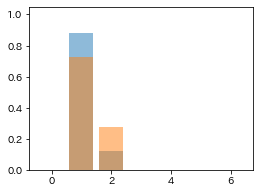

In [87]:
# 子供の数 - カテゴリ分布
plt.figure(figsize=(4, 3))
plt.bar(range(7), psi_chi[2], alpha=0.5)
plt.bar(range(7), num_chi, alpha=0.5)
plt.ylim(0.0, 1.05)
plt.show()

In [103]:
# 世代
for k in range(25):
    num_gen = np.zeros(8)
    for d in range(theta.shape[0]):
        if np.argmax(theta[d]) == k:
            num_gen[Con_ds[d][1]] += 1
            
    observed = num_gen
    expected = (sum(observed) * psi_gen[k])

    observed2 = [n+1 for n in observed]
    expected2 = [round(n)+1 for n in expected]
    try:
        result = stats.chisquare(observed2, expected2)
    except:
        continue
    print(f'トピック{k}: {result}')

トピック0: Power_divergenceResult(statistic=5.465909090909091, pvalue=0.6032990033555372)
トピック3: Power_divergenceResult(statistic=11.555555555555555, pvalue=0.11615490110924333)
トピック6: Power_divergenceResult(statistic=2.625, pvalue=0.9173940876494657)
トピック8: Power_divergenceResult(statistic=0.0, pvalue=1.0)
トピック9: Power_divergenceResult(statistic=2.43015873015873, pvalue=0.9322637268593867)
トピック11: Power_divergenceResult(statistic=6.549019607843137, pvalue=0.4772934776311778)
トピック12: Power_divergenceResult(statistic=1.2222222222222223, pvalue=0.9904062027396278)
トピック13: Power_divergenceResult(statistic=3.7954545454545454, pvalue=0.8030126446492339)
トピック14: Power_divergenceResult(statistic=5.211956521739131, pvalue=0.6341146890261238)
トピック15: Power_divergenceResult(statistic=1.4047619047619047, pvalue=0.9854249653936282)
トピック16: Power_divergenceResult(statistic=4.265350877192982, pvalue=0.748757105143018)
トピック18: Power_divergenceResult(statistic=6.273684210526316, pvalue=0.5081808300113261)

In [9]:
# 都道府県
for k in range(25):
    num_pre = np.zeros(48)
    for d in range(theta.shape[0]):
        if np.argmax(theta[d]) == k:
            num_pre[Con_ds[d][2]] += 1
            
    observed = num_pre
    expected = (sum(observed) * psi_pre[k])

    observed2 = [n+1 for n in observed]
    expected2 = [round(n)+1 for n in expected]
    try:
        result = stats.chisquare(observed2, expected2)
    except:
        # 四捨五入で数が合わないとエラー
        continue
    print(f'トピック{k}: {result}')

トピック2: Power_divergenceResult(statistic=14.157142857142857, pvalue=0.9999991196363759)
トピック3: Power_divergenceResult(statistic=13.688095238095238, pvalue=0.9999995021851912)
トピック5: Power_divergenceResult(statistic=53.53333333333333, pvalue=0.23791724492025323)
トピック7: Power_divergenceResult(statistic=13.133333333333333, pvalue=0.9999997552275071)
トピック8: Power_divergenceResult(statistic=0.0, pvalue=1.0)
トピック10: Power_divergenceResult(statistic=8.083333333333332, pvalue=0.9999999999700627)
トピック16: Power_divergenceResult(statistic=15.5, pvalue=0.9999960711880117)
トピック18: Power_divergenceResult(statistic=11.958333333333332, pvalue=0.9999999528128718)
トピック19: Power_divergenceResult(statistic=11.266666666666666, pvalue=0.9999999838507853)
トピック20: Power_divergenceResult(statistic=10.416666666666666, pvalue=0.999999996174024)


In [124]:
# 性別
for k in range(25):
    num_sex = np.zeros(3)
    for d in range(theta.shape[0]):
        if np.argmax(theta[d]) == k:
            num_sex[0] += Sex_ds[d][0]
            num_sex[1] += Sex_ds[d][1]
            num_sex[2] += Sex_ds[d][2]
            
    observed = num_sex
    expected = (sum(observed) * psi_sex[k])

    observed2 = [n+1 for n in observed]
    expected2 = [round(n)+1 for n in expected]
    try:
        result = stats.chisquare(observed2, expected2)
    except:
        continue
    print(f'トピック{k}: {result}')

トピック0: Power_divergenceResult(statistic=15.063247863247863, pvalue=0.0005358673378044014)
トピック1: Power_divergenceResult(statistic=3.9789473684210526, pvalue=0.13676738934249105)
トピック2: Power_divergenceResult(statistic=5.625, pvalue=0.060054667895307945)
トピック3: Power_divergenceResult(statistic=123.75, pvalue=1.3428544176905862e-27)
トピック5: Power_divergenceResult(statistic=4.508460634547591, pvalue=0.10495429416345455)
トピック8: Power_divergenceResult(statistic=0.0, pvalue=1.0)
トピック9: Power_divergenceResult(statistic=5.564482029598309, pvalue=0.06189963383116462)
トピック10: Power_divergenceResult(statistic=4.497354497354498, pvalue=0.10553873377322617)
トピック11: Power_divergenceResult(statistic=12.579545454545455, pvalue=0.001855181531112548)
トピック13: Power_divergenceResult(statistic=0.8080808080808081, pvalue=0.6676171462938304)
トピック14: Power_divergenceResult(statistic=31.8, pvalue=1.2437060236028703e-07)
トピック15: Power_divergenceResult(statistic=7.926739926739927, pvalue=0.018998980419826325)
トピッ

In [136]:
# 質問カテゴリ
for k in range(25):
    num_q = np.zeros(16)
    for d in range(theta.shape[0]):
        if np.argmax(theta[d]) == k:
            # 時刻によって変化
            num_q[Q_td[0, d]] += 1
            
    observed = num_q
    expected = (sum(observed) * psi_q[k])

    observed2 = [n+1 for n in observed]
    expected2 = [round(n)+1 for n in expected]
    try:
        result = stats.chisquare(observed2, expected2)
    except:
        continue
    print(f'トピック{k}: {result}')

トピック1: Power_divergenceResult(statistic=8.143939393939394, pvalue=0.9178823180020084)
トピック3: Power_divergenceResult(statistic=20.32142857142857, pvalue=0.15994595945381826)
トピック4: Power_divergenceResult(statistic=8.666666666666668, pvalue=0.8942916352645011)
トピック7: Power_divergenceResult(statistic=17.96153846153846, pvalue=0.26469300134934226)
トピック10: Power_divergenceResult(statistic=11.313492063492063, pvalue=0.7300714098317564)
トピック11: Power_divergenceResult(statistic=13.023809523809524, pvalue=0.6004588236986841)
トピック12: Power_divergenceResult(statistic=3.1911764705882355, pvalue=0.9994113992154875)
トピック14: Power_divergenceResult(statistic=6.746642246642246, pvalue=0.9643025971335563)
トピック20: Power_divergenceResult(statistic=8.064102564102564, pvalue=0.9211870209992238)
トピック23: Power_divergenceResult(statistic=18.742016806722688, pvalue=0.22566336511559834)


In [6]:
""" KS 検定 """

# 子供の数
for k in range(25):
    num_chi = np.zeros(7)
    for d in range(theta.shape[0]):
        if np.argmax(theta[d]) == k:
            num_chi[Con_ds[d][0]] += 1
            
    observed = num_chi
    expected = (sum(observed) * psi_chi[k])

    try:
        result = stats.ks_2samp(observed, expected)
    except:
        continue
    print(f'トピック{k}: {result}')

トピック0: KstestResult(statistic=0.42857142857142855, pvalue=0.5751748251748252)
トピック1: KstestResult(statistic=0.5714285714285714, pvalue=0.21212121212121213)
トピック2: KstestResult(statistic=0.7142857142857143, pvalue=0.05303030303030303)
トピック3: KstestResult(statistic=0.7142857142857143, pvalue=0.05303030303030303)
トピック4: KstestResult(statistic=0.5714285714285714, pvalue=0.21212121212121213)
トピック5: KstestResult(statistic=0.5714285714285714, pvalue=0.21212121212121213)
トピック6: KstestResult(statistic=0.5714285714285714, pvalue=0.21212121212121213)
トピック7: KstestResult(statistic=0.5714285714285714, pvalue=0.21212121212121213)
トピック8: KstestResult(statistic=0.0, pvalue=1.0)
トピック9: KstestResult(statistic=0.42857142857142855, pvalue=0.5751748251748252)
トピック10: KstestResult(statistic=0.7142857142857143, pvalue=0.05303030303030303)
トピック11: KstestResult(statistic=0.5714285714285714, pvalue=0.21212121212121213)
トピック12: KstestResult(statistic=0.5714285714285714, pvalue=0.21212121212121213)
トピック13: Kstest

In [7]:
# 世代
for k in range(25):
    num_gen = np.zeros(8)
    for d in range(theta.shape[0]):
        if np.argmax(theta[d]) == k:
            num_gen[Con_ds[d][1]] += 1
            
    observed = num_gen
    expected = (sum(observed) * psi_gen[k])

    try:
        result = stats.ks_2samp(observed, expected)
    except:
        continue
    print(f'トピック{k}: {result}')

トピック0: KstestResult(statistic=0.25, pvalue=0.98010878010878)
トピック1: KstestResult(statistic=0.25, pvalue=0.98010878010878)
トピック2: KstestResult(statistic=0.375, pvalue=0.6601398601398599)
トピック3: KstestResult(statistic=0.25, pvalue=0.98010878010878)
トピック4: KstestResult(statistic=0.5, pvalue=0.2826728826728826)
トピック5: KstestResult(statistic=0.375, pvalue=0.6601398601398599)
トピック6: KstestResult(statistic=0.375, pvalue=0.6601398601398599)
トピック7: KstestResult(statistic=0.375, pvalue=0.6601398601398599)
トピック8: KstestResult(statistic=0.0, pvalue=1.0)
トピック9: KstestResult(statistic=0.25, pvalue=0.98010878010878)
トピック10: KstestResult(statistic=0.375, pvalue=0.6601398601398599)
トピック11: KstestResult(statistic=0.375, pvalue=0.6601398601398599)
トピック12: KstestResult(statistic=0.375, pvalue=0.6601398601398599)
トピック13: KstestResult(statistic=0.25, pvalue=0.98010878010878)
トピック14: KstestResult(statistic=0.25, pvalue=0.98010878010878)
トピック15: KstestResult(statistic=0.375, pvalue=0.6601398601398599)
トピック16:

In [12]:
# 都道府県
for k in range(25):
    num_pre = np.zeros(48)
    for d in range(theta.shape[0]):
        if np.argmax(theta[d]) == k:
            num_pre[Con_ds[d][2]] += 1
            
    observed = num_pre
    expected = (sum(observed) * psi_pre[k])

    try:
        result = stats.ks_2samp(observed, expected)
    except:
        # 四捨五入で数が合わないとエラー
        continue
    print(f'トピック{k}: {result}')

トピック0: KstestResult(statistic=0.6666666666666666, pvalue=2.0582601019119725e-10)
トピック1: KstestResult(statistic=0.5416666666666666, pvalue=8.289541665347434e-07)
トピック2: KstestResult(statistic=0.6458333333333334, pvalue=9.68592989135046e-10)
トピック3: KstestResult(statistic=0.5833333333333334, pvalue=6.718891665597394e-08)
トピック4: KstestResult(statistic=0.5208333333333334, pvalue=2.667069927111783e-06)
トピック5: KstestResult(statistic=0.4583333333333333, pvalue=6.38004158410171e-05)
トピック6: KstestResult(statistic=0.8125, pvalue=4.029618551248043e-16)
トピック7: KstestResult(statistic=0.5416666666666666, pvalue=8.289541665347434e-07)
トピック8: KstestResult(statistic=0.0, pvalue=1.0)
トピック9: KstestResult(statistic=0.6458333333333334, pvalue=9.68592989135046e-10)
トピック10: KstestResult(statistic=0.6666666666666666, pvalue=2.0582601019119725e-10)
トピック11: KstestResult(statistic=0.6458333333333334, pvalue=9.68592989135046e-10)
トピック12: KstestResult(statistic=0.6875, pvalue=4.065698966739699e-11)
トピック13: KstestRe

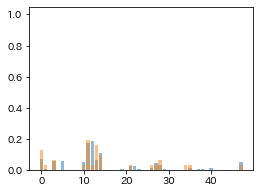

In [10]:
# 都道府県 - カテゴリ分布
plt.figure(figsize=(4, 3))
plt.bar(range(48), psi_pre[24], alpha=0.5)
plt.bar(range(48), num_pre/sum(num_pre), alpha=0.5)
plt.ylim(0.0, 1.05)
plt.show()